# Viet Nam Rainfall Analysis
## Motivation and Description
Machine learning project in Vietnam. There are two types of rainfall forecasting, which are
- Long-term forecasting: Forecasting rainfall several weeks/months in advance.
- Short-term forecasting: Forecasting rainfall several days in advance at specific locations.<br>
<p> The India Meteorological Department provides the necessary forecast data for the project.
    In this project we are planning to work on the expected rainfall duration.
    The main objective of the project is to predict the expected rainfall in a region or state ahead of time.
    We predict the rainfall using past data.</p>

## Dataset
- Dataset: Get data from ERA5

## Methodology
- Convert the data into the correct format for conducting experiments.
- Analyze the data well and observe the changes in rainfall patterns.
- Finally, we try to predict the average rainfall by splitting the data into training and
testing data. We apply many statistical and machine learning methods (XGboost, catboost, RF, linear). By using different methods, we try to compare the models running on the data source to see which model performs best.

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Types of graphs
- Bar graphs showing distribution of amount of rainfall.
- Distribution of amount of rainfall yearly, monthly, groups of months.
- Distribution of rainfall in subdivisions, districts form each month, groups of months.
- Heat maps showing correlation between amount of rainfall between months.


In [47]:
import pandas as pd
import os


print("Current working directory:", os.getcwd())


file_path = "rainfall_hourly_hanoi_2016-2024.csv"


if os.path.exists(file_path):
    print(f"File exist in: {file_path}")

    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            print("Dataset's first line:")
            for _ in range(5):
                print(f.readline())
    except Exception as e:
        print("Error:", e)


    encodings = ['utf-8', 'latin1', 'ISO-8859-1']
    for enc in encodings:
        try:
            print(f"\nTrying with encoding: {enc}")
            data = pd.read_csv(file_path, sep=",", encoding=enc)
            print("Successfully!")
            print(data.head())


            try:
                data = data.fillna(data.mean(numeric_only=True))
            except Exception as e:
                print("Error with fillna:", e)

            data.info()
            break
        except Exception as e:
            print(f"Error when read with encoding {enc}: {e}")

else:
    print(f"File not found in: {file_path}")

    dir_path = os.path.dirname(file_path)
    if os.path.exists(dir_path):
        print("Files in folder:", os.listdir(dir_path))
    else:
        print("Folder not found or inaccessible")

Current working directory: /content
File exist in: rainfall_hourly_hanoi_2016-2024.csv
Dataset's first line:
valid_time,rain_mm,t2m,d2m,sp

2016-01-01 00:00:00,3.8147118e-05,289.119964,286.135101,101389.869

2016-01-01 01:00:00,0.00073917326279,288.8985585,285.8747225,101463.05625

2016-01-01 02:00:00,0.000190761054213,290.168871,285.7128685,101545.45625

2016-01-01 03:00:00,0.0,290.322851,285.517943,101530.7


Trying with encoding: utf-8
Successfully!
            valid_time   rain_mm         t2m         d2m            sp
0  2016-01-01 00:00:00  0.000038  289.119964  286.135101  101389.86900
1  2016-01-01 01:00:00  0.000739  288.898558  285.874723  101463.05625
2  2016-01-01 02:00:00  0.000191  290.168871  285.712869  101545.45625
3  2016-01-01 03:00:00  0.000000  290.322851  285.517943  101530.70000
4  2016-01-01 04:00:00  0.000000  290.046550  285.340121  101492.75625
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78912 entries, 0 to 78911
Data columns (total 5 columns):
 #   Colu

## Dataset-1 Description
- Data consists of 4 attributes
- For some analyses, the data is from 2016 - 2024
- All attributes have total rainfall in mm.

In [48]:
data.head()

,valid_time,rain_mm,t2m,d2m,sp
0,2016-01-01 00:00:00,0.000038,289.119964,286.135101,101389.86900
1,2016-01-01 01:00:00,0.000739,288.898558,285.874723,101463.05625
2,2016-01-01 02:00:00,0.000191,290.168871,285.712869,101545.45625
3,2016-01-01 03:00:00,0.000000,290.322851,285.517943,101530.70000
4,2016-01-01 04:00:00,0.000000,290.046550,285.340121,101492.75625


In [49]:
data.describe()

,rain_mm,t2m,d2m,sp
count,78912.000000,78912.000000,78912.000000,78912.000000
mean,0.231506,297.519631,293.882636,99912.028286
std,0.643702,5.531157,5.593987,715.800033
min,0.000000,278.788659,271.708272,97601.465750
25%,0.000124,293.598630,290.298322,99324.980375
50%,0.017776,298.451700,295.639206,99877.979500
75%,0.148370,301.408002,298.515093,100452.793750
max,14.897964,313.123420,301.930517,102789.393750


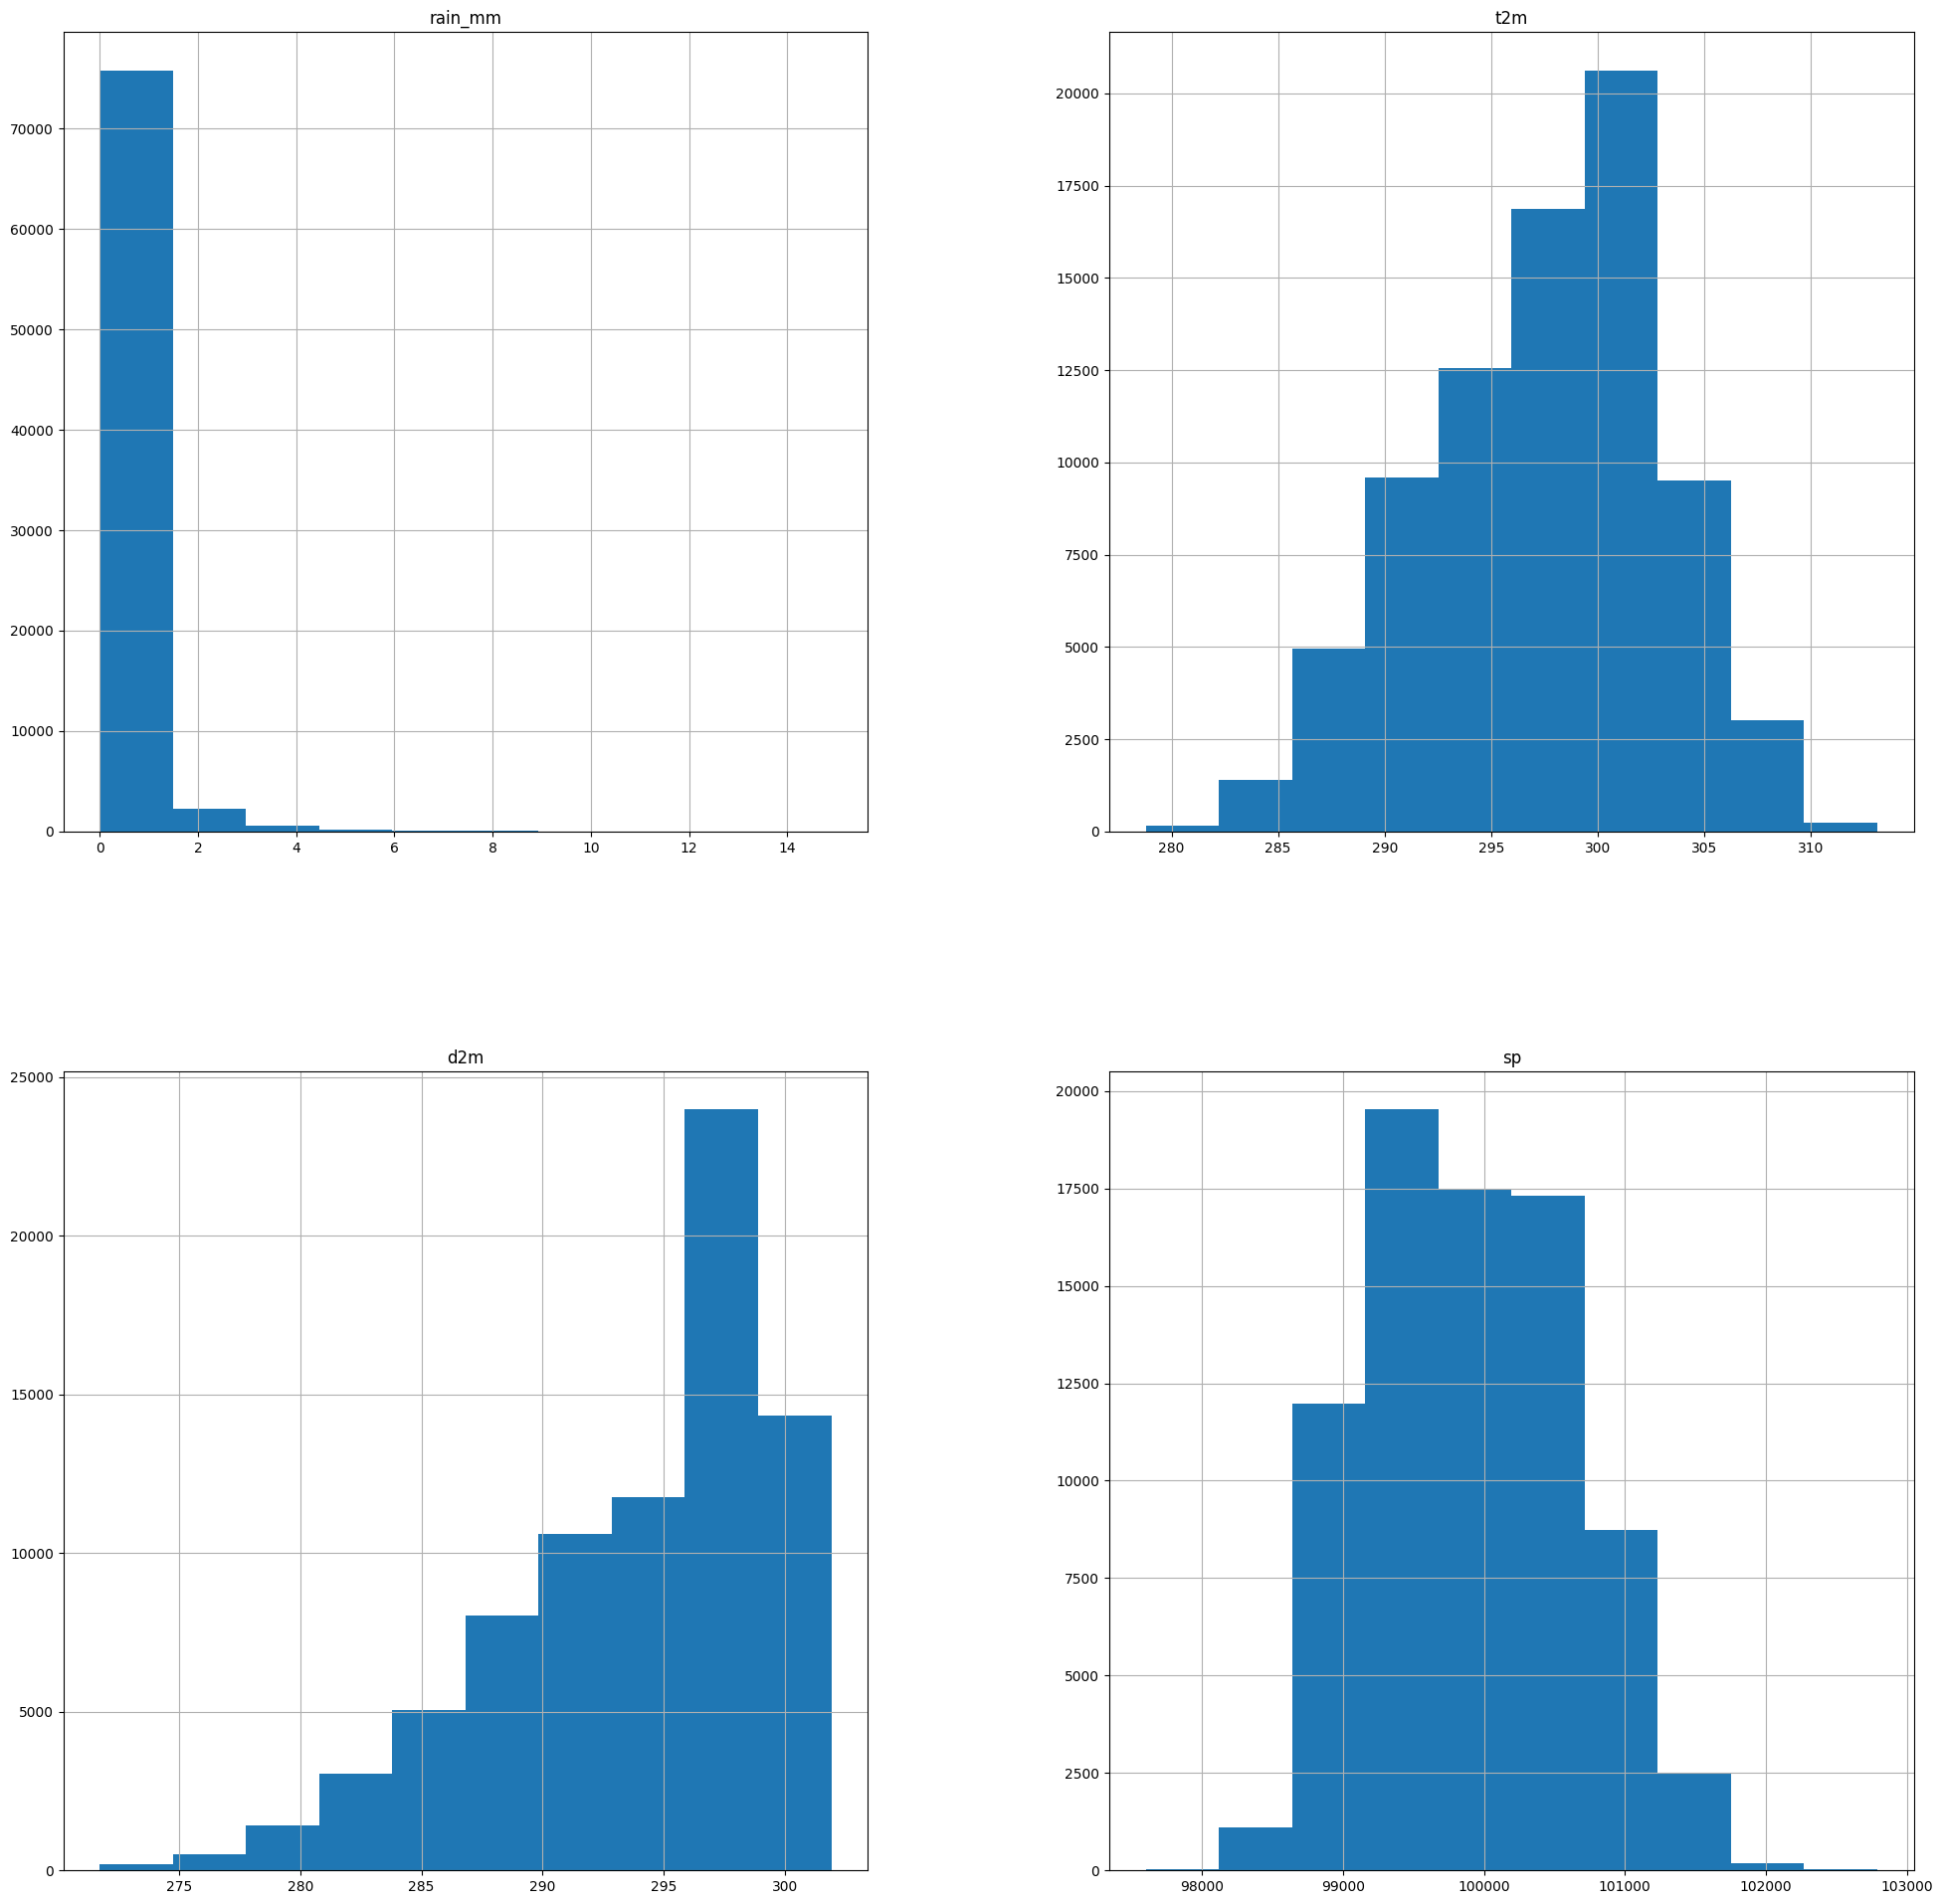

In [50]:
data.hist(figsize=(24,24));

## Observations

In [51]:
df = pd.read_csv("rainfall_hourly_hanoi_2016-2024.csv")
df['valid_time'] = pd.to_datetime(df['valid_time'])

- Biểu đồ thể hiện tần suất mưa giữa các năm từ 2016 tới 2024

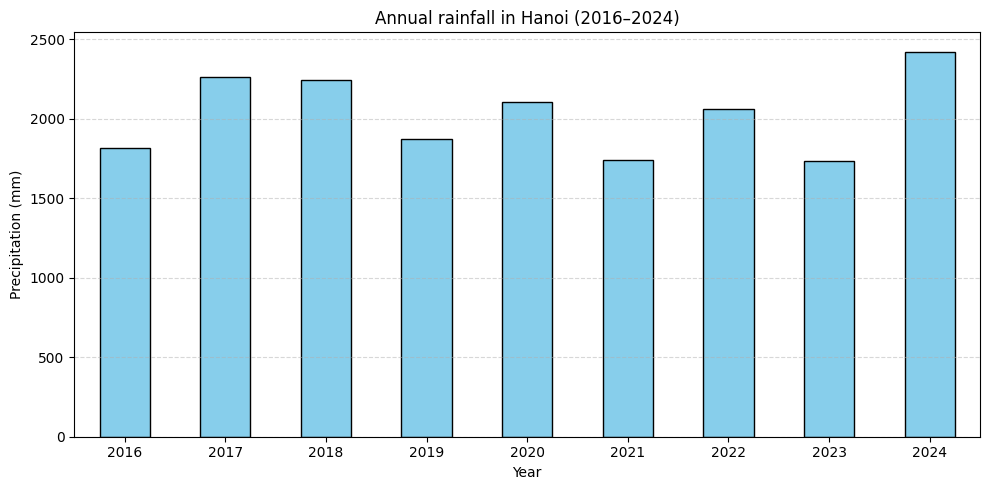

In [52]:
import pandas as pd
import matplotlib.pyplot as plt


df["year"] = df["valid_time"].dt.year


rain_by_year = df.groupby("year")["rain_mm"].sum()


plt.figure(figsize=(10, 5))
rain_by_year.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Annual rainfall in Hanoi (2016–2024)")
plt.xlabel("Year")
plt.ylabel("Precipitation (mm)")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

- The chart shows the average rainfall between months of the year.

<Axes: title={'center': 'Average Monthly Rainfall (2016–2024)'}>

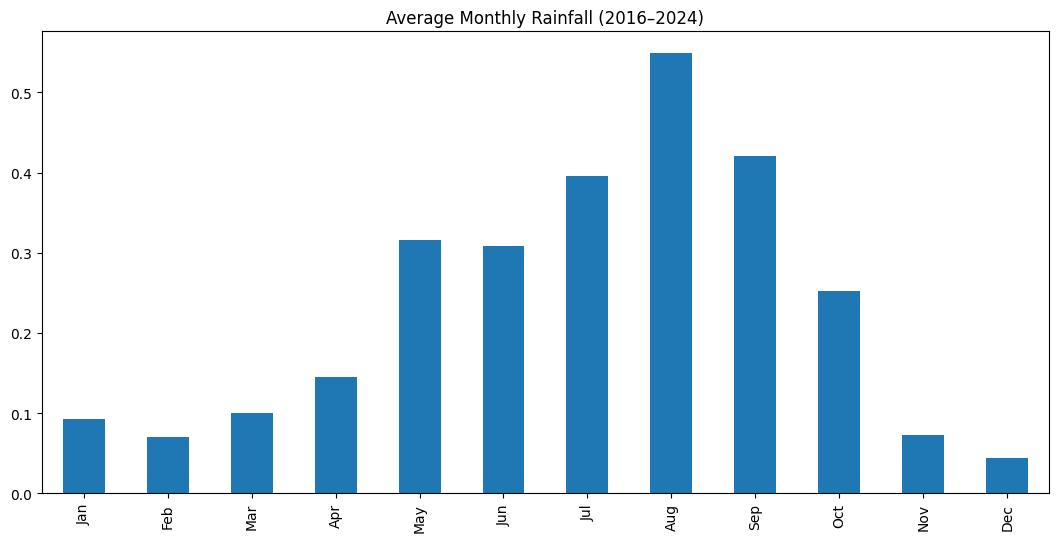

In [53]:
df['month'] = df['valid_time'].dt.month
rainfall_by_month = df.groupby('month')['rain_mm'].mean()


import calendar
rainfall_by_month.index = [calendar.month_abbr[m] for m in rainfall_by_month.index]
rainfall_by_month.plot(kind='bar', figsize=(13, 6), title='Average Monthly Rainfall (2016–2024)')



- The chart shows the amount of rainfall each month in each year.

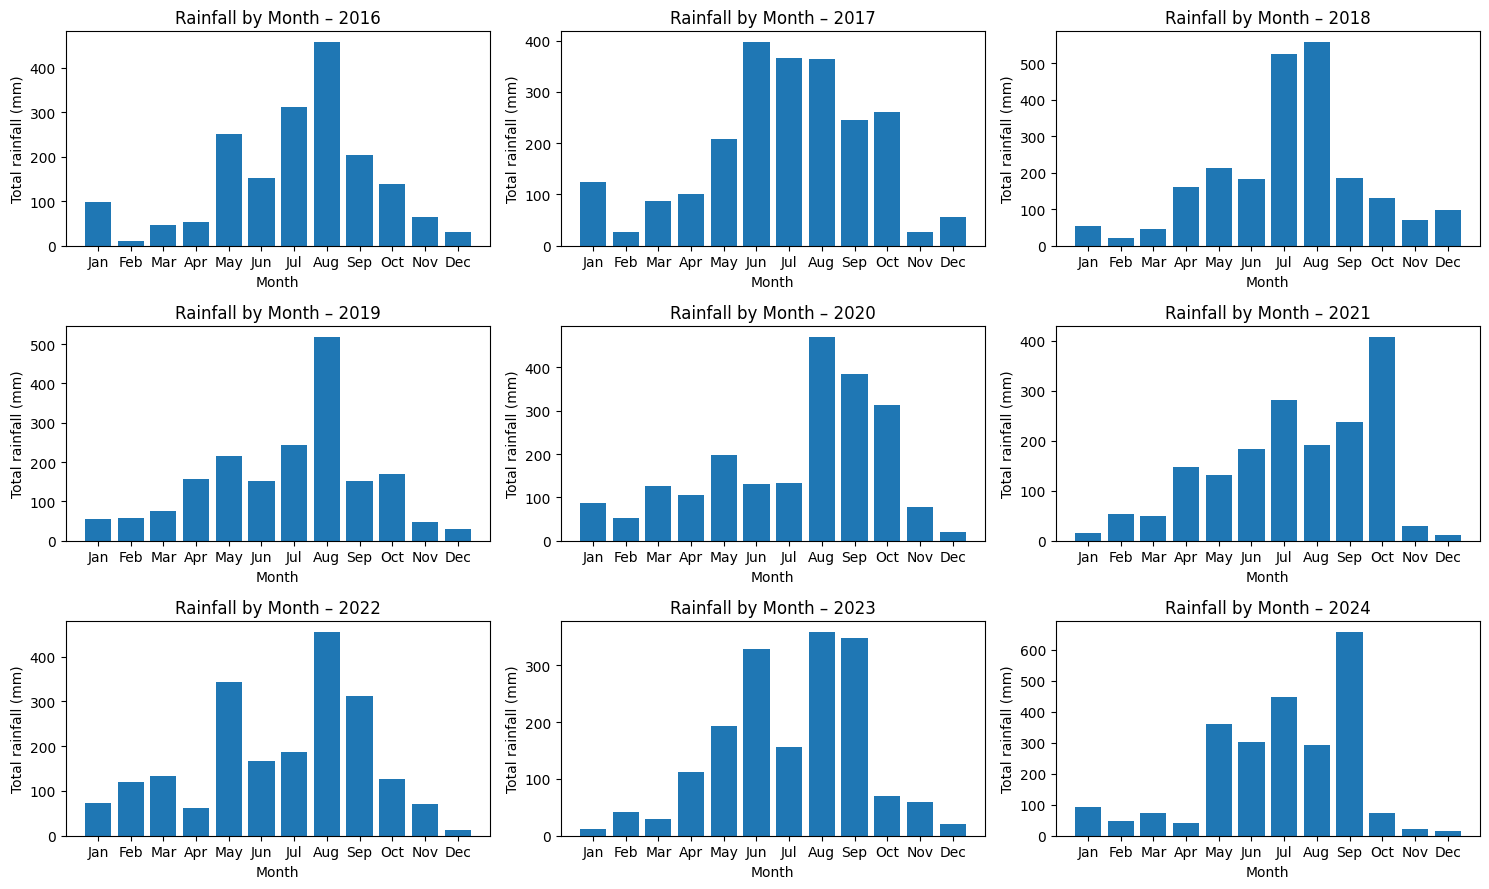

In [54]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("rainfall_hourly_hanoi_2016-2024.csv")
df["valid_time"] = pd.to_datetime(df["valid_time"])
df["year"]  = df["valid_time"].dt.year
df["month"] = df["valid_time"].dt.month


monthly_sum = (df
               .groupby(["year", "month"])["rain_mm"]
               .sum()
               .unstack(fill_value=0)
               .sort_index())

month_labels = ["Jan","Feb","Mar","Apr","May","Jun",
                "Jul","Aug","Sep","Oct","Nov","Dec"]


num_years = len(monthly_sum)
cols = 3
rows = (num_years + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(15, rows * 3))
axs = axs.flatten()


for idx, (yr, row) in enumerate(monthly_sum.iterrows()):
    ax = axs[idx]
    ax.bar(month_labels, row.values)
    ax.set_title(f"Rainfall by Month – {yr}")
    ax.set_xlabel("Month")
    ax.set_ylabel("Total rainfall (mm)")


for i in range(len(monthly_sum), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


- Biểu đồ thể hiện lượng mưa trung bình của từng giờ trong ngày

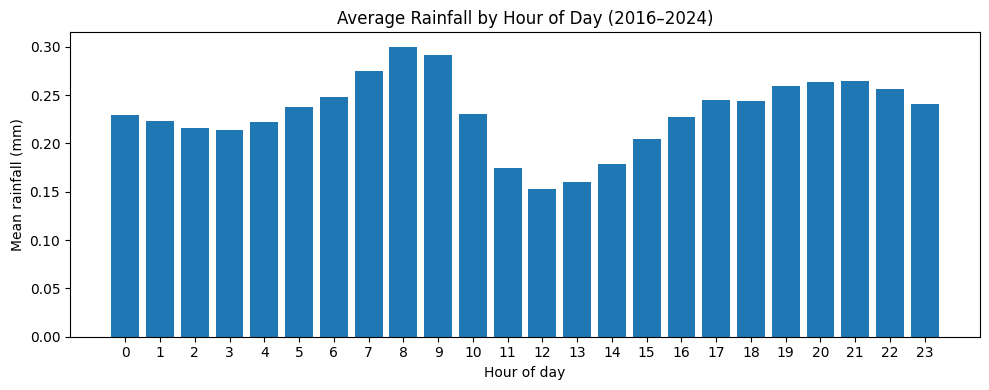

In [55]:
df["hour"] = df["valid_time"].dt.hour
hourly_mean = df.groupby("hour")["rain_mm"].mean().reindex(range(24))

plt.figure(figsize=(10,4))
plt.bar(hourly_mean.index, hourly_mean.values)
plt.title("Average Rainfall by Hour of Day (2016–2024)")
plt.xlabel("Hour of day")
plt.ylabel("Mean rainfall (mm)")
plt.xticks(range(24))
plt.tight_layout()
plt.show()


- **Heat Map** shows the co-relation(dependency) betwenn the amounts of rainfall over months

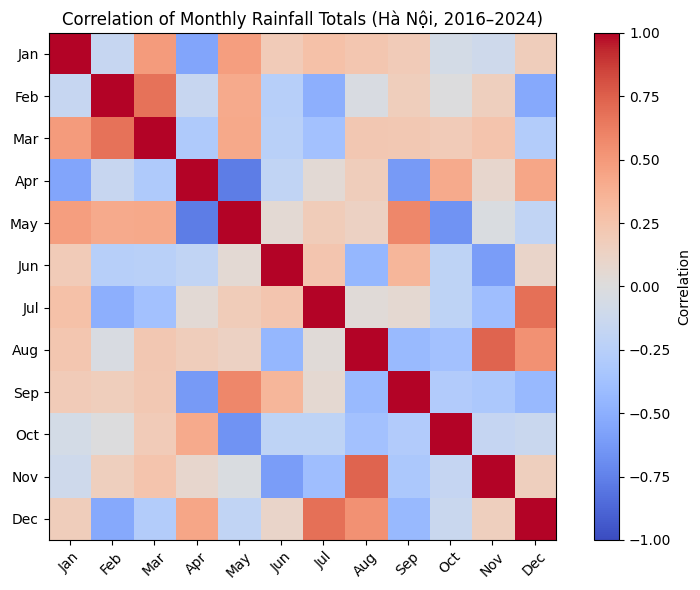

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar


df = pd.read_csv("rainfall_hourly_hanoi_2016-2024.csv")
df["valid_time"] = pd.to_datetime(df["valid_time"])


df["year"]  = df["valid_time"].dt.year
df["month"] = df["valid_time"].dt.month
monthly_totals = (
    df.groupby(["year", "month"])["rain_mm"].sum()
      .unstack(fill_value=0)
      .sort_index()
)


corr_matrix = monthly_totals.corr()


plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Correlation")
plt.xticks(range(12), [calendar.month_abbr[m] for m in range(1, 13)], rotation=45)
plt.yticks(range(12), [calendar.month_abbr[m] for m in range(1, 13)])
plt.title("Correlation of Monthly Rainfall Totals (Hà Nội, 2016–2024)")
plt.tight_layout()
plt.show()

- **Heat Map** shows the co-relation(dependency) betwenn the amounts of rainfall over hours

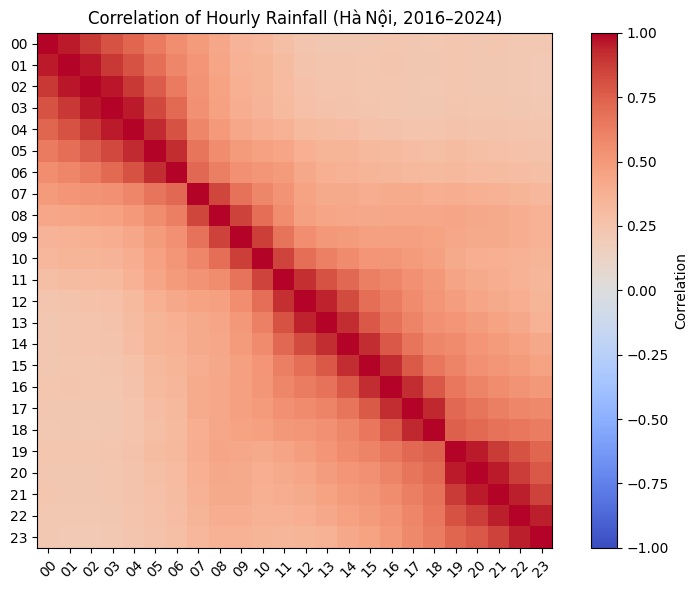

In [57]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("rainfall_hourly_hanoi_2016-2024.csv")
df["valid_time"] = pd.to_datetime(df["valid_time"])


df["date"] = df["valid_time"].dt.date
df["hour"] = df["valid_time"].dt.hour


daily_hourly = (
    df.groupby(["date", "hour"])["rain_mm"].sum()
      .unstack(fill_value=0)
      .sort_index()
)


corr_hours = daily_hourly.corr()


plt.figure(figsize=(8, 6))
plt.imshow(corr_hours, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Correlation")
plt.xticks(range(24), [f"{h:02d}" for h in range(24)], rotation=45)
plt.yticks(range(24), [f"{h:02d}" for h in range(24)])
plt.title("Correlation of Hourly Rainfall (Hà Nội, 2016–2024)")
plt.tight_layout()
plt.show()

## Predictions
- Để dự đoán, chúng tôi định dạng dữ liệu theo cách, với lượng mưa trong ba ngày qua, chúng tôi cố gắng dự đoán lượng mưa trong ngày tiếp theo liên tiếp.
- Đối với tất cả các thí nghiệm, chúng tôi sử dụng tỷ lệ đào tạo và kiểm tra là 7:2 (7 năm train : 2 năm test trên tổng 9 năm)

# Các model kiểm thử:
- ElasticNet
- XGBoost
- Catboost
- Random Forest


> - Chúng tôi cũng hiển thị lượng mưa thực tế và dự đoán bằng hình ảnh.
- Tất cả các quan sát trung bình đều được viết độ lệch chuẩn, quan sát đầu tiên biểu diễn giá trị thực tế, quan sát thứ hai biểu diễn dự đoán.

In [58]:
import pandas as pd, numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv("rainfall_hourly_hanoi_2016-2024.csv")
df["valid_time"] = pd.to_datetime(df["valid_time"])
df = df.sort_values("valid_time")
df.loc[df["rain_mm"] < 1e-4, "rain_mm"] = 0

df["hour"]  = df["valid_time"].dt.hour
df["month"] = df["valid_time"].dt.month

train_df     = df[df["valid_time"] < "2023-01-01"]
test_2023_df = df[(df["valid_time"] >= "2023-01-01") & (df["valid_time"] < "2024-01-01")]
test_2024_df = df[df["valid_time"] >= "2024-01-01"]

assert all(col in df.columns for col in ["rain_mm", "t2m", "d2m", "sp", "valid_time"])


WINDOW = 24
def make_sequences(chunk, window=WINDOW):
    rain = chunk["rain_mm"].values
    hour = chunk["hour"].values
    month = chunk["month"].values
    t2m = chunk["t2m"].values
    d2m = chunk["d2m"].values
    sp  = chunk["sp"].values
    t   = chunk["valid_time"].values

    X, y, times = [], [], []
    for i in range(len(chunk) - window):
        rain_seq = rain[i:i+window]
        t2m_seq  = t2m[i:i+window]
        d2m_seq  = d2m[i:i+window]
        sp_seq   = sp[i:i+window]


        features = [
            *rain_seq, *t2m_seq, *d2m_seq, *sp_seq,
            rain_seq.mean(), rain_seq.std(),
            t2m_seq.mean(), t2m_seq.std(),
            d2m_seq.mean(), d2m_seq.std(),
            sp_seq.mean(),  sp_seq.std(),
            np.sin(2*np.pi*hour[i+window]/24),
            np.cos(2*np.pi*hour[i+window]/24),
            np.sin(2*np.pi*month[i+window]/12),
            np.cos(2*np.pi*month[i+window]/12)
        ]
        X.append(features)
        y.append(rain[i+window])
        times.append(t[i+window])
    return np.array(X), np.array(y), pd.to_datetime(times)

X_train, y_train, _ = make_sequences(train_df)
X23, y23,  t23      = make_sequences(test_2023_df)
X24, y24,  t24      = make_sequences(test_2024_df)


scaler = StandardScaler().fit(X_train)
X_train_s, X23_s, X24_s = scaler.transform(X_train), scaler.transform(X23), scaler.transform(X24)

pt = PowerTransformer(method="yeo-johnson").fit(y_train.reshape(-1,1))
y_train_pt = pt.transform(y_train.reshape(-1,1)).ravel()

- Model ElasticNet

In [59]:
enet = ElasticNetCV(
    alphas=np.logspace(-3, 0, 20),
    l1_ratio=[.1,.3,.5,.7,.9],
    cv=5,
    max_iter=10000,
    tol=1e-3,
    random_state=42
).fit(X_train_s, y_train_pt)


def inverse_and_clip(pred_pt):
    pred = pt.inverse_transform(pred_pt.reshape(-1,1)).ravel()
    return np.clip(pred, 0, None)

pred23 = inverse_and_clip(enet.predict(X23_s))
pred24 = inverse_and_clip(enet.predict(X24_s))

mask23 = ~np.isnan(pred23) & ~np.isnan(y23)
mask24 = ~np.isnan(pred24) & ~np.isnan(y24)

def stats(y, p):
    return (mean_absolute_error(y, p),
            np.sqrt(mean_squared_error(y, p)),
            r2_score(y, p))

mae23, rmse23, r23 = stats(y23[mask23], pred23[mask23])
mae24, rmse24, r24 = stats(y24[mask24], pred24[mask24])

print("Best alpha   :", enet.alpha_)
print("Best l1_ratio:", enet.l1_ratio_)
print("Non‑zero coef:", (enet.coef_!=0).sum(), "/", len(enet.coef_))
print("=== 2023 ===  MAE:", mae23, " RMSE:", rmse23, " R²:", r23)
print("=== 2024 ===  MAE:", mae24, " RMSE:", rmse24, " R²:", r24)



Best alpha   : 0.001
Best l1_ratio: 0.1
Non‑zero coef: 86 / 108
=== 2023 ===  MAE: 0.12410730253512378  RMSE: 0.3323586969024704  R²: 0.2738807924724441
=== 2024 ===  MAE: 0.15173702267597092  RMSE: 0.38671947233538556  R²: 0.19808960469925907


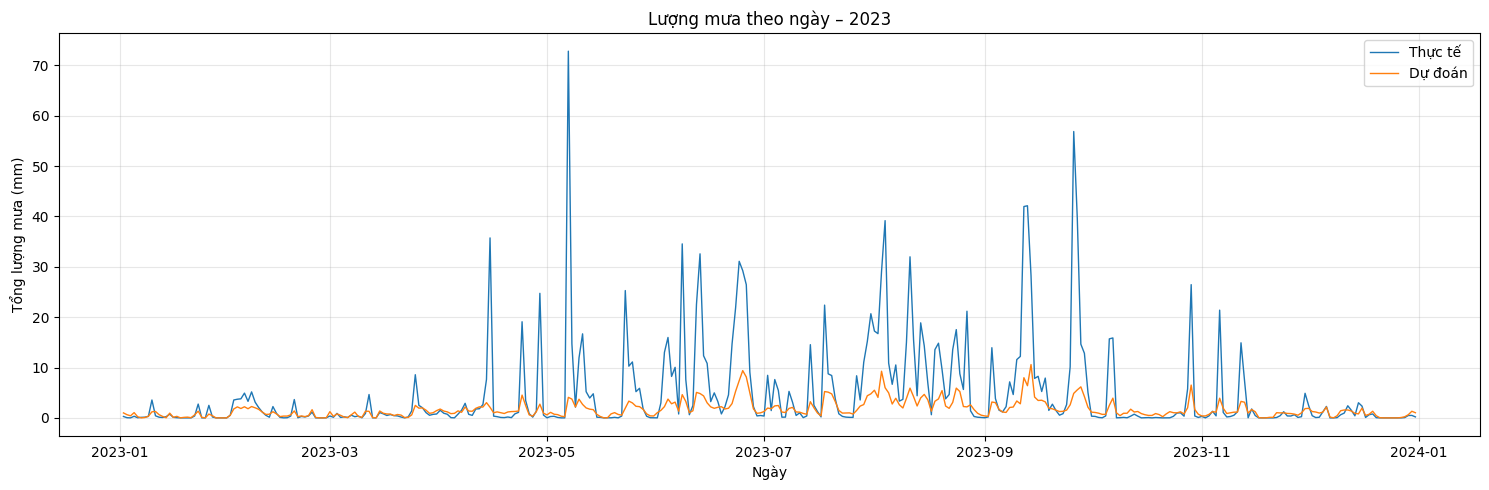

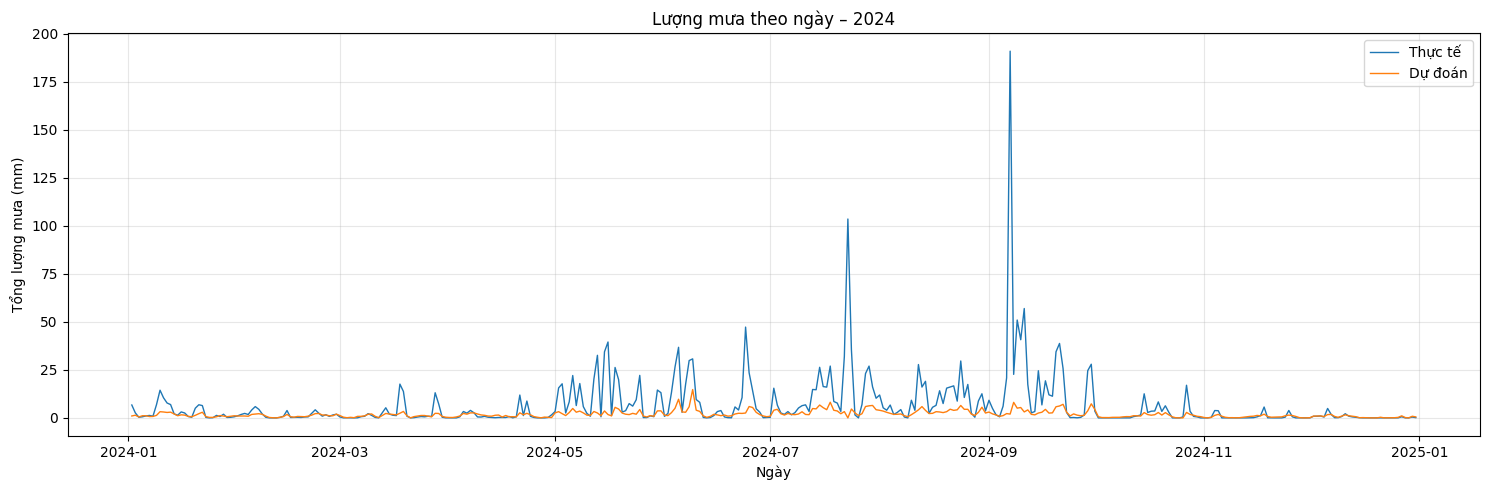

In [60]:
import matplotlib.pyplot as plt


df23_plot = pd.DataFrame({"date": t23.date, "actual": y23, "pred": pred23})
df24_plot = pd.DataFrame({"date": t24.date, "actual": y24, "pred": pred24})


daily23 = df23_plot.groupby("date").sum()
daily24 = df24_plot.groupby("date").sum()

def plot_daily(daily, year):
    plt.figure(figsize=(15,5))
    plt.plot(daily.index, daily["actual"], label="Thực tế", linewidth=1)
    plt.plot(daily.index, daily["pred"],   label="Dự đoán", linewidth=1)
    plt.title(f"Lượng mưa theo ngày – {year}")
    plt.xlabel("Ngày")
    plt.ylabel("Tổng lượng mưa (mm)")
    plt.legend()
    plt.tight_layout()
    plt.grid(alpha=0.3)
    plt.show()

plot_daily(daily23, 2023)
plot_daily(daily24, 2024)



# MÔ HÌNH XGBOOST

In [61]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv('rainfall_hourly_hanoi_2016-2024.csv', parse_dates=['valid_time'])


df = df.sort_values('valid_time')


df['rain_mm'] = df['rain_mm'].apply(lambda x: 0 if x < 1e-4 else x)


def create_sequences(data, seq_len=3):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len][['rain_mm', 't2m', 'd2m', 'sp']].values)
        y.append(data['rain_mm'].iloc[i + seq_len])
    return np.array(X), np.array(y)


train_df = df[df['valid_time'] < '2023-01-01']
test_2023_df = df[(df['valid_time'] >= '2023-01-01') & (df['valid_time'] < '2024-01-01')]
test_2024_df = df[df['valid_time'] >= '2024-01-01']


X_train, y_train = create_sequences(train_df)
X_test_2023, y_test_2023 = create_sequences(test_2023_df)
X_test_2024, y_test_2024 = create_sequences(test_2024_df)


scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_2023_scaled = scaler_X.transform(X_test_2023.reshape(X_test_2023.shape[0], -1))
X_test_2024_scaled = scaler_X.transform(X_test_2024.reshape(X_test_2024.shape[0], -1))

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()


model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train_scaled)


y_pred_2023_scaled = model.predict(X_test_2023_scaled)
y_pred_2024_scaled = model.predict(X_test_2024_scaled)


y_pred_2023 = scaler_y.inverse_transform(y_pred_2023_scaled.reshape(-1, 1)).flatten()
y_pred_2024 = scaler_y.inverse_transform(y_pred_2024_scaled.reshape(-1, 1)).flatten()


def print_statistics(y_true, y_pred, year):
    print(f"== YEARLY STATISTICS {year} ==")
    print(f"AVERAGE (mean): {np.mean(y_true)} {np.mean(y_pred)}")
    print(f"STANDARD DEVIATION (std): {np.std(y_true)} {np.std(y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred))}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred)}")
    print(f"R^2: {r2_score(y_true, y_pred)}")
    print("-" * 40)


print_statistics(y_test_2023, y_pred_2023, 2023)
print_statistics(y_test_2024, y_pred_2024, 2024)

== YEARLY STATISTICS 2023 ==
AVERAGE (mean): 0.19795404413086154 0.19699864089488983
STANDARD DEVIATION (std): 0.5744307932250599 0.5044649839401245
RMSE: 0.2592719734723546
MAE: 0.08092446793408326
R^2: 0.7962790367372106
----------------------------------------
== YEARLY STATISTICS 2024 ==
AVERAGE (mean): 0.275944891947561 0.266960471868515
STANDARD DEVIATION (std): 0.7817267571584755 0.6475691795349121
RMSE: 0.3419730817327253
MAE: 0.10653568462146402
R^2: 0.808629985638057
----------------------------------------


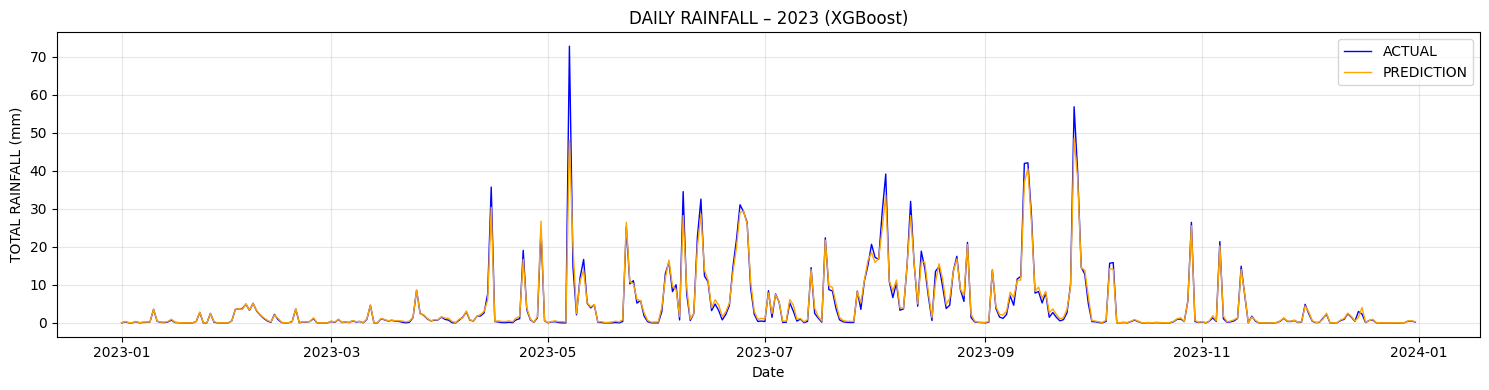

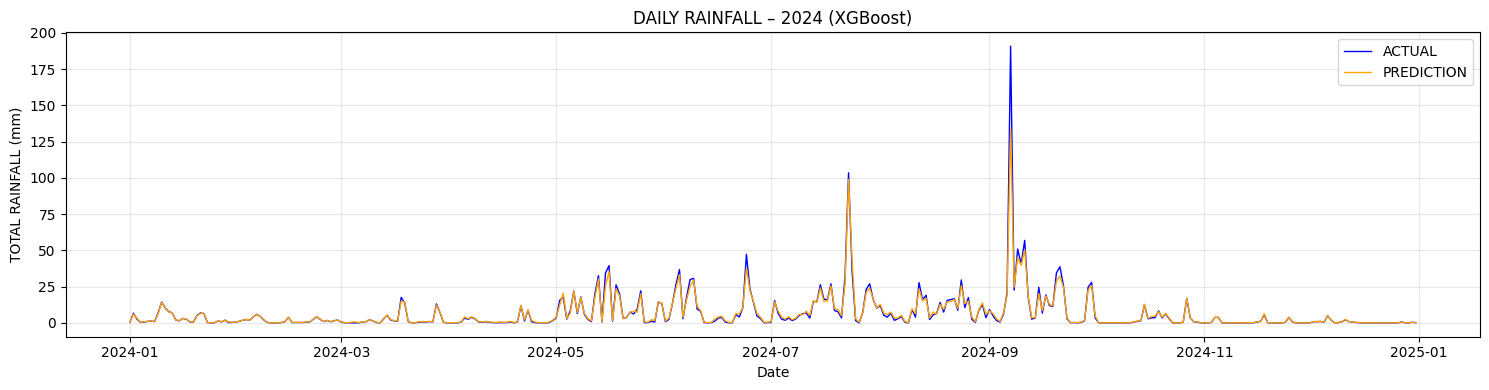

In [62]:
import pandas as pd
import matplotlib.pyplot as plt


t23 = test_2023_df['valid_time'].iloc[3:].reset_index(drop=True)
t24 = test_2024_df['valid_time'].iloc[3:].reset_index(drop=True)

df23_plot = pd.DataFrame({"date": t23.dt.date, "actual": y_test_2023, "pred": y_pred_2023})
df24_plot = pd.DataFrame({"date": t24.dt.date, "actual": y_test_2024, "pred": y_pred_2024})


daily23 = df23_plot.groupby("date").sum()
daily24 = df24_plot.groupby("date").sum()


def plot_daily(daily, year):
    plt.figure(figsize=(15, 4))
    plt.plot(daily.index, daily["actual"], label="ACTUAL", linewidth=1, color="blue")
    plt.plot(daily.index, daily["pred"], label="PREDICTION", linewidth=1, color="orange")
    plt.title(f"DAILY RAINFALL – {year} (XGBoost)")
    plt.xlabel("Date")
    plt.ylabel("TOTAL RAINFALL (mm)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


plot_daily(daily23, 2023)
plot_daily(daily24, 2024)

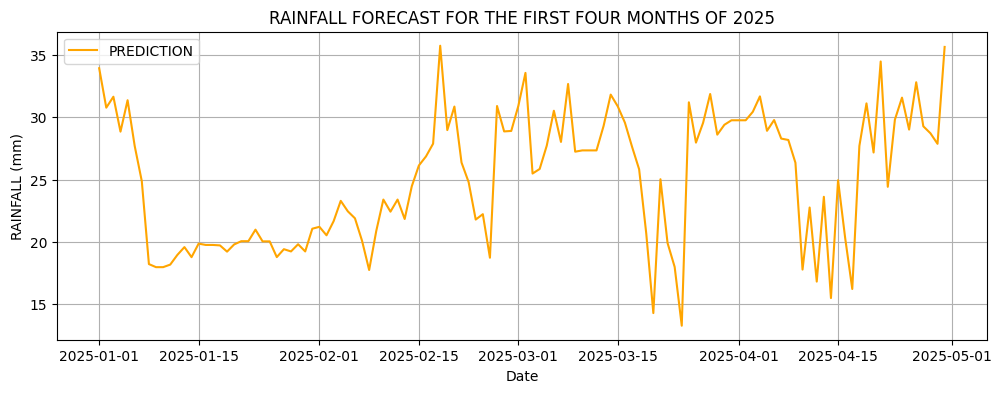

PREDICTIONS HAVE BEEN SAVED TO 'rainfall_prediction_2025.csv'


In [63]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import matplotlib.pyplot as plt


dates = pd.date_range("2016-01-01", "2024-12-31", freq="D")
rain_mm = np.random.uniform(0, 50, len(dates))
df = pd.DataFrame({'date': dates, 'rain_mm': rain_mm})


df['day_of_year'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month
df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365.25)
df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365.25)


df['lag_1'] = df['rain_mm'].shift(1)
df = df.dropna()

train_df = df[df['date'] < '2024-01-01']


features = ['lag_1', 'day_of_year_sin', 'day_of_year_cos', 'month']
X_train = train_df[features]
y_train = train_df['rain_mm']

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)
model.fit(X_train, y_train)


dates_2025 = pd.date_range("2025-01-01", "2025-04-30", freq="D")
df_2025 = pd.DataFrame({'date': dates_2025})
df_2025['day_of_year'] = df_2025['date'].dt.dayofyear
df_2025['month'] = df_2025['date'].dt.month
df_2025['day_of_year_sin'] = np.sin(2 * np.pi * df_2025['day_of_year'] / 365.25)
df_2025['day_of_year_cos'] = np.cos(2 * np.pi * df_2025['day_of_year'] / 365.25)


last_rain = df['rain_mm'].iloc[-1]


pred_vals = []
current_lag = last_rain
for idx, row in df_2025.iterrows():
    X_pred = np.array([[current_lag, row['day_of_year_sin'], row['day_of_year_cos'], row['month']]])
    pred = model.predict(X_pred)[0]
    pred_vals.append(pred)
    current_lag = pred

df_2025['rain_pred_mm'] = pred_vals


plt.figure(figsize=(12, 4))
plt.plot(df_2025['date'], df_2025['rain_pred_mm'], label="PREDICTION", color="orange")
plt.title("RAINFALL FORECAST FOR THE FIRST FOUR MONTHS OF 2025")
plt.xlabel("Date")
plt.ylabel("RAINFALL (mm)")
plt.legend()
plt.grid()
plt.show()


df_2025[['date', 'rain_pred_mm']].to_csv('rainfall_prediction_2025.csv', index=False)
print("PREDICTIONS HAVE BEEN SAVED TO 'rainfall_prediction_2025.csv'")

# Random forest

In [64]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv('rainfall_hourly_hanoi_2016-2024.csv', parse_dates=['valid_time'])


df = df.sort_values('valid_time')


df['rain_mm'] = df['rain_mm'].apply(lambda x: 0 if x < 1e-4 else x)


def create_sequences(data, seq_len=3):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len][['rain_mm', 't2m', 'd2m', 'sp']].values)
        y.append(data['rain_mm'].iloc[i + seq_len])
    return np.array(X), np.array(y)


train_df = df[df['valid_time'] < '2023-01-01']
test_2023_df = df[(df['valid_time'] >= '2023-01-01') & (df['valid_time'] < '2024-01-01')]
test_2024_df = df[df['valid_time'] >= '2024-01-01']


X_train, y_train = create_sequences(train_df)
X_test_2023, y_test_2023 = create_sequences(test_2023_df)
X_test_2024, y_test_2024 = create_sequences(test_2024_df)


scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_2023_scaled = scaler_X.transform(X_test_2023.reshape(X_test_2023.shape[0], -1))
X_test_2024_scaled = scaler_X.transform(X_test_2024.reshape(X_test_2024.shape[0], -1))

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()


model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train_scaled, y_train_scaled)


y_pred_2023_scaled = model.predict(X_test_2023_scaled)
y_pred_2024_scaled = model.predict(X_test_2024_scaled)


y_pred_2023 = scaler_y.inverse_transform(y_pred_2023_scaled.reshape(-1, 1)).flatten()
y_pred_2024 = scaler_y.inverse_transform(y_pred_2024_scaled.reshape(-1, 1)).flatten()


def print_statistics(y_true, y_pred, year):
    print(f"== YEARLY STATISTICS {year} ==")
    print(f"AVERAGE (mean): {np.mean(y_true):.4f} {np.mean(y_pred):.4f}")
    print(f"STANDARD DEVIATION (std): {np.std(y_true):.4f} {np.std(y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"R^2: {r2_score(y_true, y_pred):.4f}")
    print("-" * 40)


print_statistics(y_test_2023, y_pred_2023, 2023)
print_statistics(y_test_2024, y_pred_2024, 2024)

== YEARLY STATISTICS 2023 ==
AVERAGE (mean): 0.1980 0.1978
STANDARD DEVIATION (std): 0.5744 0.5228
RMSE: 0.2563
MAE: 0.0794
R^2: 0.8009
----------------------------------------
== YEARLY STATISTICS 2024 ==
AVERAGE (mean): 0.2759 0.2691
STANDARD DEVIATION (std): 0.7817 0.6809
RMSE: 0.2956
MAE: 0.1016
R^2: 0.8570
----------------------------------------


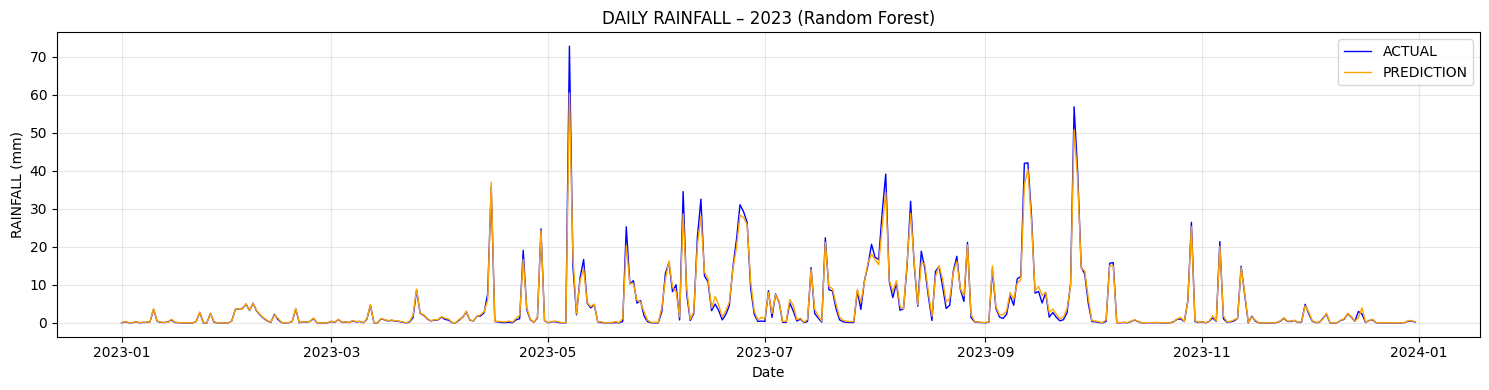

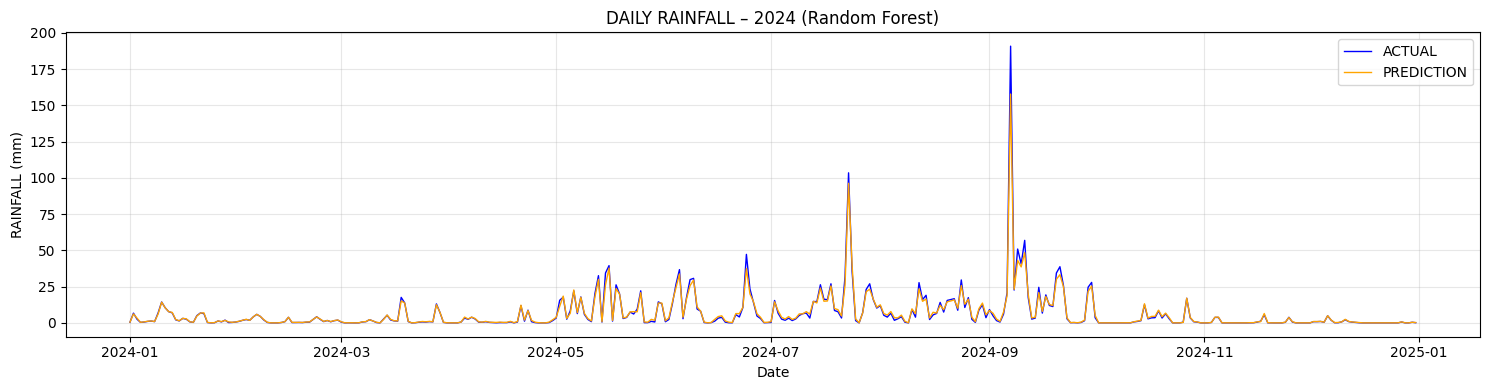

In [65]:
import pandas as pd
import matplotlib.pyplot as plt


t23 = test_2023_df['valid_time'].iloc[3:].reset_index(drop=True)
t24 = test_2024_df['valid_time'].iloc[3:].reset_index(drop=True)

df23_plot = pd.DataFrame({"date": t23.dt.date, "actual": y_test_2023, "pred": y_pred_2023})
df24_plot = pd.DataFrame({"date": t24.dt.date, "actual": y_test_2024, "pred": y_pred_2024})


daily23 = df23_plot.groupby("date").sum()
daily24 = df24_plot.groupby("date").sum()


def plot_daily(daily, year):
    plt.figure(figsize=(15, 4))
    plt.plot(daily.index, daily["actual"], label="ACTUAL", linewidth=1, color="blue")
    plt.plot(daily.index, daily["pred"], label="PREDICTION", linewidth=1, color="orange")
    plt.title(f"DAILY RAINFALL – {year} (Random Forest)")
    plt.xlabel("Date")
    plt.ylabel("RAINFALL (mm)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


plot_daily(daily23, 2023)
plot_daily(daily24, 2024)

# CATBOOST



In [68]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv('rainfall_hourly_hanoi_2016-2024.csv', parse_dates=['valid_time'])


df = df.sort_values('valid_time')


df['rain_mm'] = df['rain_mm'].apply(lambda x: 0 if x < 1e-4 else x)


def create_sequences(data, seq_len=3):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len][['rain_mm', 't2m', 'd2m', 'sp']].values)
        y.append(data['rain_mm'].iloc[i + seq_len])
    return np.array(X), np.array(y)


train_df = df[df['valid_time'] < '2023-01-01']
test_2023B_df = df[(df['valid_time'] >= '2023-01-01') & (df['valid_time'] < '2024-01-01')]
test_2024B_df = df[df['valid_time'] >= '2024-01-01']


X_train, y_train = create_sequences(train_df)
X_test_2023B, y_test_2023B = create_sequences(test_2023B_df)
X_test_2024B, y_test_2024B = create_sequences(test_2024B_df)


scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_2023B_scaled = scaler_X.transform(X_test_2023B.reshape(X_test_2023B.shape[0], -1))
X_test_2024B_scaled = scaler_X.transform(X_test_2024B.reshape(X_test_2024B.shape[0], -1))

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()


Cat = CatBoostRegressor(
    iterations=100,
    learning_rate=0.1,
    depth=5,
    loss_function='RMSE',
    verbose=0,
    random_seed=42
)
Cat.fit(X_train_scaled, y_train_scaled)


y_pred_2023B_scaled = Cat.predict(X_test_2023B_scaled)
y_pred_2024B_scaled = Cat.predict(X_test_2024B_scaled)


y_pred_2023B = scaler_y.inverse_transform(y_pred_2023B_scaled.reshape(-1, 1)).flatten()
y_pred_2024B = scaler_y.inverse_transform(y_pred_2024B_scaled.reshape(-1, 1)).flatten()


def print_statistics(y_true, y_pred, year):
    print(f"== YEARLY STATISTICS {year} ==")
    print(f"AVERAGE (mean): {np.mean(y_true)} {np.mean(y_pred)}")
    print(f"STANDARD DEVIATION (std): {np.std(y_true)} {np.std(y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred))}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred)}")
    print(f"R^2: {r2_score(y_true, y_pred)}")
    print("-" * 40)


print_statistics(y_test_2023B, y_pred_2023B, 2023)
print_statistics(y_test_2024B, y_pred_2024B, 2024)

== YEARLY STATISTICS 2023 ==
AVERAGE (mean): 0.19795404413086154 0.19446605221665425
STANDARD DEVIATION (std): 0.5744307932250599 0.4796541073056368
RMSE: 0.2638577563355247
MAE: 0.08375331657653054
R^2: 0.7890088182391795
----------------------------------------
== YEARLY STATISTICS 2024 ==
AVERAGE (mean): 0.275944891947561 0.2676347142260106
STANDARD DEVIATION (std): 0.7817267571584755 0.644037288165334
RMSE: 0.3451591483575006
MAE: 0.1086622261675646
R^2: 0.8050474937293115
----------------------------------------


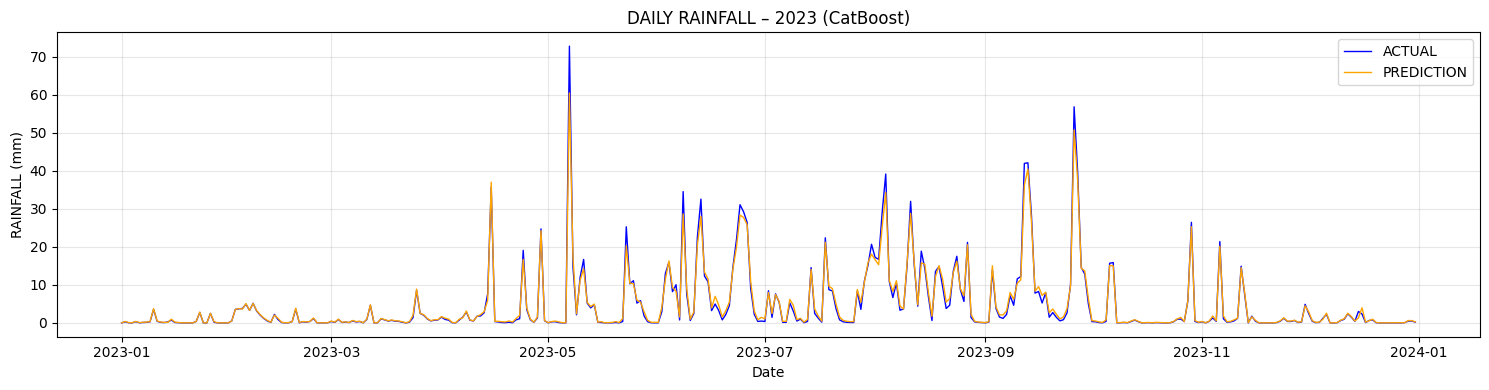

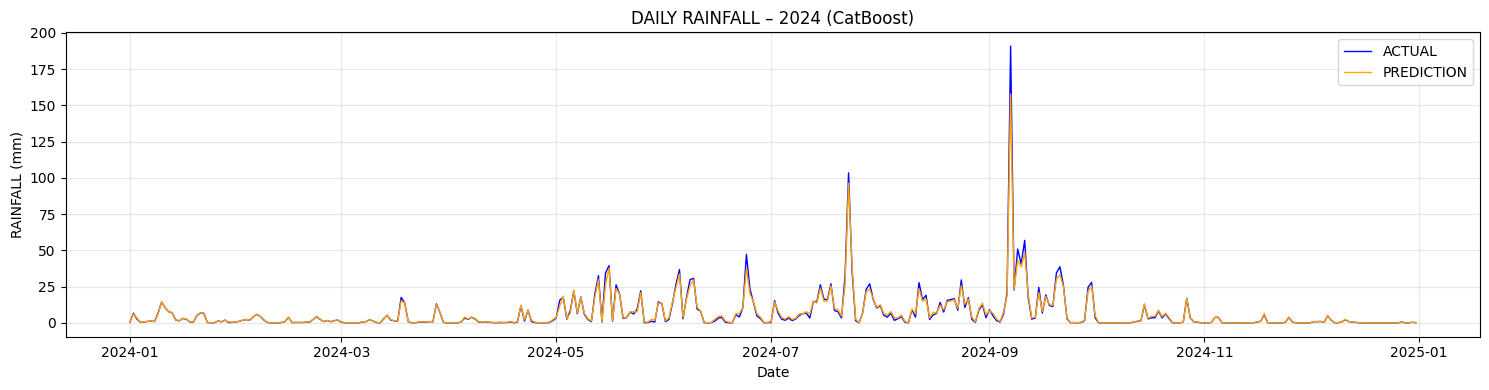

In [69]:
import pandas as pd
import matplotlib.pyplot as plt


t23B = test_2023B_df['valid_time'].iloc[3:].reset_index(drop=True)
t24B = test_2024B_df['valid_time'].iloc[3:].reset_index(drop=True)

df23B_plot = pd.DataFrame({"date": t23B.dt.date, "actual": y_test_2023B, "pred": y_pred_2023B})
df24B_plot = pd.DataFrame({"date": t24B.dt.date, "actual": y_test_2024B, "pred": y_pred_2024B})


daily23B = df23_plot.groupby("date").sum()
daily24B = df24_plot.groupby("date").sum()


def plot_daily(daily, year):
    plt.figure(figsize=(15, 4))
    plt.plot(daily.index, daily["actual"], label="ACTUAL", linewidth=1, color="blue")
    plt.plot(daily.index, daily["pred"], label="PREDICTION", linewidth=1, color="orange")
    plt.title(f"DAILY RAINFALL – {year} (CatBoost)")
    plt.xlabel("Date")
    plt.ylabel("RAINFALL (mm)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


plot_daily(daily23B, 2023)
plot_daily(daily24B, 2024)